# 1. Preparação do ambiente e carregamendo dos dados

In [603]:
# Carregamento dos pacotes que serão utilizados

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 8000)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Código de utilização no kaggle para upload dos dados
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Carregamento do dataset completo
df_exoplanets_full = pd.read_csv('/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_ready.csv')
print('Carregado o arquivo: dataset_exoplanets_29.07.2022_ready.csv')
print('Carregamento completo. O Shape do dataset completo é ' + str(df_exoplanets_full.shape))

/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_ready.csv
/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_fullcopy.csv
/kaggle/input/exoplanet-full-data-set-july-2022/README.md
/kaggle/input/exoplanet-full-data-set-july-2022/Data columns in Kepler Objects of Interest Table.pdf
Carregado o arquivo: dataset_exoplanets_29.07.2022_ready.csv
Carregamento completo. O Shape do dataset completo é (9564, 141)


----------------------------------------------------------------------------------------------------------------------------------------------

# 2. Seleção de dados e Montagem do dataset para treinanamento

## Criação do dataset de dados - realizando o drop dos atributos que não serão utilizados no treinamento

In [604]:
# Atributos retirados da tabela incluem valores de erros dos instrumentos de medidas e datas irrelevantes
df_exoplanets_data = df_exoplanets_full.loc[:,df_exoplanets_full.columns.drop([
                                              'koi_pdisposition',
                                              'koi_vet_stat',
                                              'koi_vet_date',
                                              'koi_disp_prov',
                                              'koi_comment',
                                              'koi_period_err1',
                                              'koi_period_err2',
                                              'koi_time0bk',
                                              'koi_time0bk_err1',
                                              'koi_time0bk_err2',
                                              'koi_time0',
                                              'koi_time0_err1',
                                              'koi_time0_err2',
                                              'koi_eccen_err1',
                                              'koi_eccen_err2',
                                              'koi_longp_err1',
                                              'koi_longp_err2',
                                              'koi_impact_err1',
                                              'koi_impact_err2',
                                              'koi_duration_err1',
                                              'koi_duration_err2',
                                              'koi_ingress_err1',
                                              'koi_ingress_err2',
                                              'koi_depth_err1',
                                              'koi_depth_err2',
                                              'koi_ror_err1',
                                              'koi_ror_err2',
                                              'koi_srho_err1',
                                              'koi_srho_err2',
                                              'koi_fittype',
                                              'koi_prad_err1',
                                              'koi_prad_err2',
                                              'koi_sma_err1',
                                              'koi_sma_err2',
                                              'koi_incl_err1',
                                              'koi_incl_err2',
                                              'koi_teq_err1',
                                              'koi_teq_err2',
                                              'koi_insol',
                                              'koi_insol_err1',
                                              'koi_insol_err2',
                                              'koi_dor',
                                              'koi_dor_err1',
                                              'koi_dor_err2',
                                              'koi_limbdark_mod',
                                              'koi_parm_prov',
                                              'koi_tce_plnt_num',
                                              'koi_tce_delivname',
                                              'koi_quarters',
                                              'koi_bin_oedp_sig',
                                              'koi_trans_mod',
                                              'koi_model_dof',
                                              'koi_model_chisq',
                                              'koi_datalink_dvr',
                                              'koi_datalink_dvs',
                                              'koi_steff_err1',
                                              'koi_steff_err2',
                                              'koi_slogg_err1',
                                              'koi_slogg_err2',
                                              'koi_smet_err1',
                                              'koi_smet_err2',
                                              'koi_srad_err1',
                                              'koi_srad_err2',
                                              'koi_smass_err1',
                                              'koi_smass_err2',
                                              'koi_sage_err1',
                                              'koi_sage_err2',
                                              'koi_sparprov',
                                              'koi_fwm_stat_sig',
                                              'koi_fwm_sra',
                                              'koi_fwm_sra_err',
                                              'koi_fwm_sdec',
                                              'koi_fwm_sdec_err',
                                              'koi_fwm_srao',
                                              'koi_fwm_srao_err',
                                              'koi_fwm_sdeco',
                                              'koi_fwm_sdeco_err',
                                              'koi_fwm_prao',
                                              'koi_fwm_prao_err',
                                              'koi_fwm_pdeco',
                                              'koi_fwm_pdeco_err',
                                              'koi_dicco_mra',
                                              'koi_dicco_mra_err',
                                              'koi_dicco_mdec',
                                              'koi_dicco_mdec_err',
                                              'koi_dicco_msky',
                                              'koi_dicco_msky_err',
                                              'koi_dikco_mra',
                                              'koi_dikco_mra_err',
                                              'koi_dikco_mdec',
                                              'koi_dikco_mdec_err',
                                              'koi_dikco_msky',
                                              'koi_dikco_msky_err'
                                             ])]

print('O shape do dataset df_exoplanets_data é ' + str(df_exoplanets_data.shape))
print('Total de colunas excluídas: ' + str(df_exoplanets_full.shape[1]-df_exoplanets_data.shape[1]))

O shape do dataset df_exoplanets_data é (9564, 48)
Total de colunas excluídas: 93


In [605]:
# Foi verificado que os atributos 'koi_eccen','koi_longp','koi_ingress','koi_ldm_coeff3','koi_ldm_coeff4','koi_sage' apresentam APENAS valores zeros ou nulos.
# Esses atributos foram retirados pois não inserem informação ao modelo
print(df_exoplanets_data[['koi_eccen','koi_longp','koi_ingress','koi_ldm_coeff3','koi_ldm_coeff4','koi_sage']].describe())
df_exoplanets_data.drop(['koi_eccen','koi_longp','koi_ingress','koi_ldm_coeff3','koi_ldm_coeff4','koi_sage'],axis=1,inplace=True)
print('O shape do dataset df_exoplanets_data é ' + str(df_exoplanets_data.shape))

       koi_eccen  koi_longp  koi_ingress  koi_ldm_coeff3  koi_ldm_coeff4  \
count     9201.0        0.0          0.0          9201.0          9201.0   
mean         0.0        NaN          NaN             0.0             0.0   
std          0.0        NaN          NaN             0.0             0.0   
min          0.0        NaN          NaN             0.0             0.0   
25%          0.0        NaN          NaN             0.0             0.0   
50%          0.0        NaN          NaN             0.0             0.0   
75%          0.0        NaN          NaN             0.0             0.0   
max          0.0        NaN          NaN             0.0             0.0   

       koi_sage  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  
O shape do dataset df_exoplanets_data é (9564, 42)


In [606]:
# Atributos irrelevantes - 'rowid', 'kepid', 'kepoi_name', 'kepler_name'
# Esses atributos são de identificação e não representam informação no modelo
df_exoplanets_data.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name'],axis=1,inplace=True)
print('O shape do dataset df_exoplanets_data é ' + str(df_exoplanets_data.shape))

O shape do dataset df_exoplanets_data é (9564, 38)


In [607]:
# O atributo koi_disposition é o target
# Ele apresenta 3 possibilidades: FALSE POSITIVE, CONFIRMED e CANDIDATE. 
#- FALSE POSITIVE - Confirmado por outros métodos que 
#- CONFIRMED - Confirmado como exoplaneta
#- CANDIDATE - Ainda em avaliação

# A base será separada em dois conjuntos:
#- FALSE POSITIVE + CONFIRMED
#- CANDIDATE

# A primeira base será utilizada para treinamento e teste 
# A base de candidatos poderá ser utlizada para verificação de quais objetos de interesse seriam confirmados como planetas utilizando o modelo
df_exoplanets_candidates = df_exoplanets_data.loc[df_exoplanets_data['koi_disposition']=='CANDIDATE',:]
df_exoplanets = df_exoplanets_data.loc[df_exoplanets_data['koi_disposition']!='CANDIDATE',:]

print('O shape do dataset df_exoplanets_candidates é ' + str(df_exoplanets_candidates.shape))
print('O shape do dataset df_exoplanets é ' + str(df_exoplanets.shape))

O shape do dataset df_exoplanets_candidates é (2056, 38)
O shape do dataset df_exoplanets é (7508, 38)


----------------------------------------------------------------------------------------------------------------------------------------------

# 3. Pré-Processamento, Análise de Outliers e Dados Nulos/Vazios

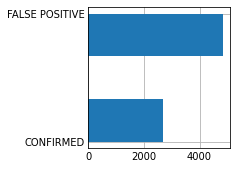

Base Balanceada. Aproximadamente relação de 1:2 - CONFIRMADO/FALSO POSITIVO


In [608]:
#Avaliando o balanceamento da base de dados
#df_exoplanets.hist(df_exoplanets['koi_disposition'])
plt.style.use('_mpl-gallery')
df_exoplanets.koi_disposition.hist(bins=3, orientation = 'horizontal')
plt.show()
#print(df_exoplanets.groupby('koi_disposition')['koi_disposition'].count())
print('Base Balanceada. Aproximadamente relação de 1:2 - CONFIRMADO/FALSO POSITIVO')

In [609]:
# Necessário preencher os valores Nulos no atributos ou verificar se existe relevancia nele.
df_exoplanets.isna().any()

koi_disposition     False
koi_score            True
koi_fpflag_nt       False
koi_fpflag_ss       False
koi_fpflag_co       False
koi_fpflag_ec       False
koi_period          False
koi_impact           True
koi_duration        False
koi_depth            True
koi_ror              True
koi_srho             True
koi_prad             True
koi_sma              True
koi_incl             True
koi_teq              True
koi_ldm_coeff2       True
koi_ldm_coeff1       True
koi_max_sngle_ev     True
koi_max_mult_ev      True
koi_model_snr        True
koi_count           False
koi_num_transits     True
koi_steff            True
koi_slogg            True
koi_smet             True
koi_srad             True
koi_smass            True
ra                  False
dec                 False
koi_kepmag           True
koi_gmag             True
koi_rmag             True
koi_imag             True
koi_zmag             True
koi_jmag             True
koi_hmag             True
koi_kmag             True
dtype: bool

In [642]:
#Atributo koi_score
print(df_exoplanets.koi_score.isna().sum()) #Somatorio de valores nulos
print(df_exoplanets.koi_score.describe())
#Como o koi_score é a confiança em relação a classe do registro. Preenchimento dos valores nulos será de acordo com o pior caso. Substituição de NULO por ZERO
#df_exoplanets.loc[:,'koi_score'].fillna(value=0,axis=1, inplace=True)
#print(df_exoplanets.koi_score.isna().sum()) #Somatorio de valores nulos
#df_exoplanets

0
count    7508.000000
mean        0.360547
std         0.467961
min         0.000000
25%         0.000000
50%         0.000000
75%         0.996000
max         1.000000
Name: koi_score, dtype: float64


ValueError: No axis named 1 for object type Series

In [611]:
# Atributo koi_impact com valores Outliers
#print(df_exoplanets.koi_impact.describe())
#print('Valores NULOS: ' + str(df_exoplanets.koi_impact.isna().sum()))
#df_exoplanets.koi_impact.plot(kind='box',figsize=(10,5),logy=True)
#plt.show()
# Inseridos Valores Médios
#df_exoplanets.koi_impact.fillna(df_exoplanets.koi_impact.mean(), inplace=True)
#print('Valores NULOS: ' + str(df_exoplanets.koi_impact.isna().sum()))
# Outliers mantidos por terem significado


In [612]:
# Atributo koi_depth com valores Outliers
#print(df_exoplanets.koi_depth.describe())
#print('Valores NULOS: ' + str(df_exoplanets.koi_impact.isna().sum()))
#df_exoplanets.koi_depth.plot(kind='box',figsize=(10,5),logy=True)
#plt.show()

# Outliers mantidos por terem significado

In [613]:
# Atributo koi_ror com valores Outliers
#print(df_exoplanets.koi_ror.describe())
#print('Valores NULOS: ' + str(df_exoplanets.koi_ror.isna().sum()))
#df_exoplanets.koi_ror.plot(kind='box',figsize=(10,5),logy=True)
#plt.show()

# Outliers mantidos por terem significado

#### Atributo koi_srho
#### Atributos com valores Outliers - Necessário tratamento

In [614]:
#df_exoplanets.koi_srho.describe()
#df_exoplanets.koi_srho.plot(kind='box')

#### Atributo koi_prad
#### Atributos com valores Outliers - Necessário tratamento

In [615]:
#df_exoplanets.koi_prad.describe()
#df_exoplanets.koi_prad.plot(kind='box')

#### Atributo koi_sma
#### Atributo corrigido inserindo valor médio nas colunas nulas

In [616]:
#print(df_exoplanets.koi_sma.isna().any())
#df_exoplanets.koi_sma.describe()
#df_exoplanets.koi_sma.hist()
#df_exoplanets.koi_sma.fillna(df_exoplanets.koi_sma.mean(), inplace=True)
#print(df_exoplanets.koi_sma.isna().any())

#### Atributo koi_incl
#### Atributo corrigido inserindo valor médio nas colunas nulas

In [617]:
#df_exoplanets.koi_incl.describe()
#df_exoplanets.koi_incl.fillna(df_exoplanets.koi_incl.mean(), inplace=True)
#df_exoplanets.koi_incl.isna().any()

#### Atributo koi_teq
#### Atributos com valores Outliers - Necessário tratamento

In [618]:
#df_exoplanets.koi_teq.describe()
#df_exoplanets.koi_teq.plot(kind='box')

#### Atributo koi_ldm_coeff1 koi_ldm_coeff2 koi_ldm_coeff3 koi_ldm_coeff4
#### coeficiente 1 e 2 com médias inseridas
#### retirados coeficientes 3 e 4 - somente zeros

In [619]:
#print(df_exoplanets[['koi_ldm_coeff1','koi_ldm_coeff2','koi_ldm_coeff3','koi_ldm_coeff4']].describe())
#df_exoplanets.koi_ldm_coeff1.fillna(df_exoplanets.koi_ldm_coeff1.mean(), inplace=True)
#df_exoplanets.koi_ldm_coeff2.fillna(df_exoplanets.koi_ldm_coeff2.mean(), inplace=True)
#df_exoplanets = df_exoplanets.drop(['koi_ldm_coeff3','koi_ldm_coeff4'], axis=1)


#### Atributo koi_max_sngle_ev
#### Atributos com valores Outliers - Necessário tratamento

In [620]:
#df_exoplanets.koi_max_sngle_ev.describe()

#### Atributo koi_max_mult_ev
#### Atributos com valores Outliers - Necessário tratamento

In [621]:
#df_exoplanets.koi_max_mult_ev.describe()

#### Atributo koi_model_snr
#### Atributos com valores Outliers - Necessário tratamento

In [622]:
#df_exoplanets.koi_model_snr.describe()

#### Atributo koi_num_transits
#### Valores completos com a média

In [623]:
#df_exoplanets.koi_num_transits.fillna(df_exoplanets.koi_num_transits.mean(), inplace=True)

#### Atributo koi_steff
#### Valores completos com a média

In [624]:
#df_exoplanets.koi_steff.fillna(df_exoplanets.koi_steff.mean(), inplace=True)

#### Atributo koi_slogg
#### Valores completos com a média

In [625]:
#df_exoplanets.koi_slogg.fillna(df_exoplanets.koi_slogg.mean(), inplace=True)

#### Atributo koi_smet
#### Valores completos com a média

In [626]:
#df_exoplanets.koi_smet.describe()
#df_exoplanets.koi_smet.isna().sum()
#df_exoplanets.koi_smet.fillna(df_exoplanets.koi_smet.mean(), inplace=True)

#### Atributo koi_srad
#### Atributos com valores Outliers - Necessário tratamento

In [627]:
#df_exoplanets.koi_srad.describe()

#### Atributo koi_smass
#### Valores completos com a média

In [628]:
#df_exoplanets.koi_smass.isna().sum()
#df_exoplanets.koi_smass.describe()
#df_exoplanets.koi_smass.fillna(df_exoplanets.koi_smass.mean(), inplace=True)

#### Atributo koi_kepmag
#### Valores completos com a média

In [629]:
#print(df_exoplanets.koi_kepmag.describe())
#df_exoplanets.koi_kepmag.fillna(df_exoplanets.koi_kepmag.mean(), inplace=True)

#### Atributo koi_gmag
#### Valores completos com a média

In [630]:
#print(df_exoplanets.koi_gmag.describe())
#df_exoplanets.koi_gmag.fillna(df_exoplanets.koi_gmag.mean(), inplace=True)

#### Atributo koi_rmag
#### Valores completos com a média

In [631]:
#print(df_exoplanets.koi_rmag.describe())
#df_exoplanets.koi_rmag.fillna(df_exoplanets.koi_rmag.mean(), inplace=True)

#### Atributo koi_imag
#### Valores completos com a média

In [632]:
#print(df_exoplanets.koi_imag.describe())
#df_exoplanets.koi_imag.fillna(df_exoplanets.koi_imag.mean(), inplace=True)

#### Atributo koi_zmag
#### Valores completos com a média

In [633]:
#print(df_exoplanets.koi_zmag.describe())
#df_exoplanets.koi_zmag.fillna(df_exoplanets.koi_zmag.mean(), inplace=True)

#### Atributo koi_jmag
#### Valores completos com a média

In [634]:
#print(df_exoplanets.koi_jmag.describe())
#df_exoplanets.koi_jmag.fillna(df_exoplanets.koi_jmag.mean(), inplace=True)

#### Atributo koi_hmag
#### Valores completos com a média

In [635]:
#print(df_exoplanets.koi_hmag.describe())
#df_exoplanets.koi_hmag.fillna(df_exoplanets.koi_hmag.mean(), inplace=True)

#### Atributo koi_kmag
#### Valores completos com a média

In [636]:
#print(df_exoplanets.koi_kmag.describe())
#df_exoplanets.koi_kmag.fillna(df_exoplanets.koi_kmag.mean(), inplace=True)

In [637]:
#df_exoplanets.isna().any()

#### Verificando os tipos de dados dentro do dataframe temos somente o atributo Alvo como categórico
#### É necessário alterar os valores de falso positivo e confirmado para 0 e 1 respectivamente 

In [638]:
#df_exoplanets.koi_disposition

In [639]:
#le = preprocessing.LabelEncoder()
#le.fit(df_exoplanets.koi_disposition)

#y = le.transform(df_exoplanets.koi_disposition)

#X = df_exoplanets.iloc[:,1:(df_exoplanets.shape[1])]


In [640]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [641]:
#exoplanets_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
#exoplanets_tree = exoplanets_tree.fit(X_train, y_train)
#print("Acurácia (base de treinamento):", exoplanets_tree.score(X_train, y_train))